<a href="https://colab.research.google.com/github/sreyaarc/Food-Review---NLP/blob/main/NLP_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Find various trends and patterns in the reviews data, create useful insights that
# best describe the product quality.
# 2. Classify each review based on the sentiment associated with the same.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("Reviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.shape

(568454, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
s

**Helper Functions**

In [ ]:
def seconds_to_day(sec):
  import datetime as dt
  return dt.date.fromtimestamp(sec)
# The fromtimestamp method allows to create a datetime.date object from a Unix timestamp.

In [ ]:
def roundVal(data):
  import numpy as np
  for idx, val in enumerate(data):
    data[idx] = np.round(val, 2)
  return data

In [ ]:
def formatNum(num):
  return("{:,}".format(num))
# The , specifies that a comma should be used as a thousands separator.

In [ ]:
randNum = np.random.randint(0,df.shape[0], 5)
num = 0
for i in randNum:
  print(f"Review Item:{num+1}")
  num+=1
  print(f"Summmary:{df.Summary[i]}")
  print(f"Text:{df.Text[i]}")
  print("\n")

Review Item:1
Summmary:RAW and Wonderful and a Great Value!
Text:I want to comment on a previous review which asserts that <a href="http://www.amazon.com/gp/product/B000EDBPZC">Bob's Red Mill Organic Whole Grain Buckwheat Groats Raw, 16-Ounce Packages (Pack of 4)</a> are misadvertised and are not a raw product.  I beg to differ please.<br /><br />These wonderful groats are in fact RAW.  I buy them often from Amazon and being a raw foodie, sprout them before consuming.  I've never had a problem with these groats not sprouting and they would NOT sprout had they been steamed as the disgruntled reviewer claims.  They seem to green up after soaking and will sprout quickly  ~ as a matter of fact, just yesterday I made some buckwheat brownies and cookies for Christmas treats and the groats sprouted in 12 hours!  (Of course I live in Florida and the warm weather may be a factor). By the way, my treats turned out incredibly delicious and I give credit to the quality of the Bob's buckwheat.<br /

In [ ]:
pd.DataFrame(df.dtypes, columns=["dtype"])

,dtype
Id,int64
ProductId,object
UserId,object
ProfileName,object
HelpfulnessNumerator,int64
HelpfulnessDenominator,int64
Score,int64
Time,int64
Summary,object
Text,object


In [ ]:
# null vlaues
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [ ]:
np.round(df.isnull().sum()/df.shape[0]*100,5)   # contribution of null values is very less

Id                        0.00000
ProductId                 0.00000
UserId                    0.00000
ProfileName               0.00281
HelpfulnessNumerator      0.00000
HelpfulnessDenominator    0.00000
Score                     0.00000
Time                      0.00000
Summary                   0.00475
Text                      0.00000
dtype: float64

In [ ]:
df = df.dropna()  # dropping null values
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [ ]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...


In [ ]:
df.Score.value_counts()

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64

In [ ]:
df[df.duplicated(keep="first")]
# no duplicate values present

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


<Axes: >

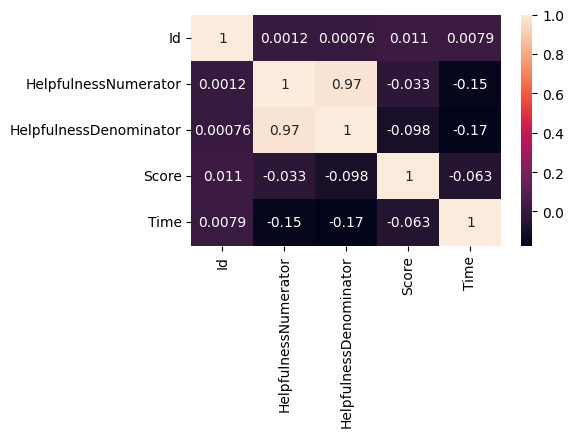

In [ ]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568411.000000,568411.000000,568411.000000,568411.000000,5.684110e+05
mean,284227.440964,1.743874,2.227876,4.183309,1.296261e+09
std,164099.020907,7.636781,8.288752,1.310368,4.803792e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142114.500000,0.000000,0.000000,4.000000,1.271290e+09
50%,284224.000000,0.000000,1.000000,5.000000,1.311120e+09
75%,426341.500000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.000000,5.000000,1.351210e+09


In [ ]:
df.corr()["Score"]

Id                        0.010712
HelpfulnessNumerator     -0.032594
HelpfulnessDenominator   -0.097808
Score                     1.000000
Time                     -0.062964
Name: Score, dtype: float64

In [ ]:
time = []
unformattedTime = df["Time"].values

for t in unformattedTime:
  time.append(seconds_to_day(t))

pd.DataFrame(time, columns=["Time"]).head()

,Time
0,2011-04-27
1,2012-09-07
2,2008-08-18
3,2011-06-13
4,2012-10-21


In [ ]:
df["Time"] = time
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df.Time.min()

datetime.date(1999, 10, 8)

In [ ]:
df.Time.max()

datetime.date(2012, 10, 26)

In [ ]:
df.HelpfulnessNumerator.unique()

array([  1,   0,   3,   4,   2,  19,  13,   9,  15,   5,  17,   8,   6,
         7,  43,  14,  11,  20,  27,  12,  10,  16,  21,  26,  23, 165,
        45,  30, 100,  32,  24,  22,  18,  59, 187,  29, 112, 107,  51,
        36,  25,  88,  35,  38,  42,  70,  86,  48,  34,  96,  53,  40,
        31,  65, 128,  97,  82,  37,  28, 202,  47, 149,  80,  77,  69,
        56,  39, 111,  60,  66,  44,  91, 115,  93, 180, 129,  58,  83,
        55,  62,  89,  50,  33, 135,  71, 157,  73, 122,  90,  81, 203,
       168,  64,  61, 398, 206, 133,  41,  84,  63,  95,  68, 110,  57,
        72,  52,  54,  49, 177,  46, 137, 286,  87, 264,  85, 258,  75,
       119, 123, 131, 125, 200, 536, 301,  78, 559, 472, 232, 294,  79,
        67, 154, 105,  74, 117, 113, 141, 162, 349, 130, 230, 189, 454,
       172, 116, 179, 138, 166, 142, 170, 247, 366, 106, 219,  94,  76,
        92, 413, 139, 866, 524, 233, 104, 844,  99, 144, 124, 491, 355,
       121, 192, 580, 102, 155, 436, 446, 262, 319, 103, 356, 43

In [ ]:
df.HelpfulnessDenominator.unique()

array([  1,   0,   3,   4,   2,   5,  19,  13,   9,   7,  15,   8,   6,
        10,  47,  17,  14,  27,  12,  11,  21,  31,  18,  23, 168,  46,
        30, 133,  16,  36,  25,  26,  24,  22,  29,  20,  64, 216,  33,
       112, 108,  51,  37,  39,  89,  35,  43,  42,  74,  49,  34,  28,
        53,  96,  58,  41,  65, 130, 100,  84,  38,  40,  32,  48, 219,
       155,  83,  85,  72,  56,  63, 128,  79,  76,  55,  68,  66,  44,
        94,  59, 117, 188, 134,  92,  57,  71,  98,  90,  45, 135, 170,
        77,  52, 123,  50,  93,  88, 122, 212, 192, 120, 401, 209,  95,
        86,  99,  73,  60, 124,  54,  61,  70, 180,  91,  81, 138, 163,
       307, 270, 151,  78,  62, 119, 139, 137, 215, 539, 305, 562, 477,
       235,  87,  69, 298,  75,  82, 103, 156, 110, 144,  80,  67, 127,
       162, 181, 356, 245, 462, 174, 111, 182, 143, 179, 159, 101, 171,
        97, 249, 384, 187, 121, 263, 131, 165, 416, 106, 878, 536, 238,
       109, 923, 115, 150, 371, 105, 154, 125, 149, 569, 360, 22

In [ ]:
# helpfullness ->   1 => very helpful 0 => least helpful
df["Helpfullness"] = df["HelpfulnessNumerator"] / df["HelpfulnessDenominator"]
df["Helpfullness"]

0         1.0
1         NaN
2         1.0
3         1.0
4         NaN
         ... 
568449    NaN
568450    NaN
568451    1.0
568452    1.0
568453    NaN
Name: Helpfullness, Length: 568411, dtype: float64

In [ ]:
# filling NAN (where denominator=0) with -1
df["Helpfullness"] = df["Helpfullness"].fillna(-1)

In [ ]:
df[df["Helpfullness"] == -1].shape

(270039, 11)

In [ ]:
helpfullness = df[["HelpfulnessNumerator", "HelpfulnessDenominator", "Helpfullness",
                   "Score", "Time"]].sort_values("HelpfulnessDenominator", ascending=False)
helpfullness.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Helpfullness,Score,Time
207712,844,923,0.914410,3,2009-09-08
190733,866,878,0.986333,5,2006-11-28
566779,808,815,0.991411,5,2009-12-14
235722,580,593,0.978078,1,2011-07-02
222937,491,569,0.862917,3,2008-06-01


In [ ]:
helpfullness.tail()

,HelpfulnessNumerator,HelpfulnessDenominator,Helpfullness,Score,Time
256616,0,0,-1.0,2,2011-01-03
256615,0,0,-1.0,3,2011-01-03
256614,0,0,-1.0,2,2011-01-05
256613,0,0,-1.0,4,2011-01-11
568453,0,0,-1.0,5,2012-05-31


In [ ]:
helpfullness.shape

(568411, 5)

In [ ]:
helpful = helpfullness[(helpfullness.HelpfulnessNumerator>0) & (helpfullness.HelpfulnessNumerator <= helpfullness.HelpfulnessDenominator)]
helpful.shape

(264596, 5)

In [ ]:
helpful.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Helpfullness,Score,Time
207712,844,923,0.914410,3,2009-09-08
190733,866,878,0.986333,5,2006-11-28
566779,808,815,0.991411,5,2009-12-14
235722,580,593,0.978078,1,2011-07-02
222937,491,569,0.862917,3,2008-06-01


In [ ]:
helpful.tail()

,HelpfulnessNumerator,HelpfulnessDenominator,Helpfullness,Score,Time
202645,1,1,1.0,2,2008-09-06
490640,1,1,1.0,5,2011-12-10
490639,1,1,1.0,5,2012-05-04
196610,1,1,1.0,5,2011-05-05
196614,1,1,1.0,4,2011-04-13


In [ ]:
helpfullness.Helpfullness.nunique()

952

In [ ]:
len(list(set(helpfullness.Helpfullness)))

952

In [ ]:
help_rate = list(set(helpfullness.Helpfullness))
len(help_rate)

952

In [ ]:
help_rate = pd.DataFrame(help_rate, columns=["help_rate"]).sort_values("help_rate", ascending=False).reset_index()
help_rate

,index,help_rate
0,19,3.000000
1,520,1.500000
2,3,1.000000
3,282,0.996894
4,84,0.996198
...,...,...
947,89,0.022222
948,331,0.021277
949,49,0.010989
950,10,0.000000


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfullness
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,-1.0


In [ ]:
bins = [-1,0,0.2,0.4,0.6,0.8,1.0]
df["help_rate"] = pd.cut(df.Helpfullness, bins, labels=["Empty", "0-20%", "20-40%", "40-60%", "60-80%", "80-100%"])
df.help_rate

0         80-100%
1             NaN
2         80-100%
3         80-100%
4             NaN
           ...   
568449        NaN
568450        NaN
568451    80-100%
568452    80-100%
568453        NaN
Name: help_rate, Length: 568411, dtype: category
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfullness,help_rate
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,-1.0,NaN


In [ ]:
df.groupby(["Score", "help_rate"]).agg("count")

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score help_rate                                                                 
1     Empty        8060       8060    8060         8060                  8060   
      0-20%        2338       2338    2338         2338                  2338   
      20-40%       4649       4649    4649         4649                  4649   
      40-60%       6586       6586    6586         6586                  6586   
      60-80%       5836       5836    5836         5836                  5836   
      80-100%     12531      12531   12531        12531                 12531   
2     Empty        4234       4234    4234         4234                  4234   
      0-20%         737        737     737          737                   737   
      20-40%       1618       1618    1618         1618                  1618   
      40-60%       3051       3051    3051         3051                  3051   
      60-80%       2486       2486    2486         2486                  2486   
      80-100%      7014       7014    7014         7014                  7014   
3     Empty        5062       5062    5062         5062                  5062   
      0-20%         474        474     474          474                   474   
      20-40%       1506       1506    1506         1506                  1506   
      40-60%       3384       3384    3384         3384                  3384   
      60-80%       2754       2754    2754         2754                  2754   
      80-100%     11036      11036   11036        11036                 11036   
4     Empty        4780       4780    4780         4780                  4780   
      0-20%         116        116     116          116                   116   
      20-40%        909        909     909          909                   909   
      40-60%       3185       3185    3185         3185                  3185   
      60-80%       2941       2941    2941         2941                  2941   
      80-100%     26707      26707   26707        26707                 26707   
5     Empty       11638      11638   11638        11638                 11638   
      0-20%         432        432     432          432                   432   
      20-40%       2275       2275    2275         2275                  2275   
      40-60%      10312      10312   10312        10312                 10312   
      60-80%      11060      11060   11060        11060                 11060   
      80-100%    140659     140659  140659       140659                140659   

                 HelpfulnessDenominator    Time  Summary    Text  Helpfullness  
Score help_rate                                                                 
1     Empty                        8060    8060     8060    8060          8060  
      0-20%                        2338    2338     2338    2338          2338  
      20-40%                       4649    4649     4649    4649          4649  
      40-60%                       6586    6586     6586    6586          6586  
      60-80%                       5836    5836     5836    5836          5836  
      80-100%                     12531   12531    12531   12531         12531  
2     Empty                        4234    4234     4234    4234          4234  
      0-20%                         737     737      737     737           737  
      20-40%                       1618    1618     1618    1618          1618  
      40-60%                       3051    3051     3051    3051          3051  
      60-80%                       2486    2486     2486    2486          2486  
      80-100%                      7014    7014     7014    7014          7014  
3     Empty                        5062    5062     5062    5062          5062  
      0-20%                         474     474      474     474           474  
      20-40%                       1506    1506     1506    1506          1506  
      40-60%                       3384    3384    

In [ ]:
df_summary = df.groupby(["Score", "help_rate"]).agg({"Id":"count"}).reset_index()
df_summary

,Score,help_rate,Id
0,1,Empty,8060
1,1,0-20%,2338
2,1,20-40%,4649
3,1,40-60%,6586
4,1,60-80%,5836
5,1,80-100%,12531
6,2,Empty,4234
7,2,0-20%,737
8,2,20-40%,1618
9,2,40-60%,3051


In [ ]:
# creating a pivot table for better understanding
df_summary.pivot(index="help_rate", columns="Score")

Id                            
Score          1     2      3      4       5
help_rate                                   
Empty       8060  4234   5062   4780   11638
0-20%       2338   737    474    116     432
20-40%      4649  1618   1506    909    2275
40-60%      6586  3051   3384   3185   10312
60-80%      5836  2486   2754   2941   11060
80-100%    12531  7014  11036  26707  140659

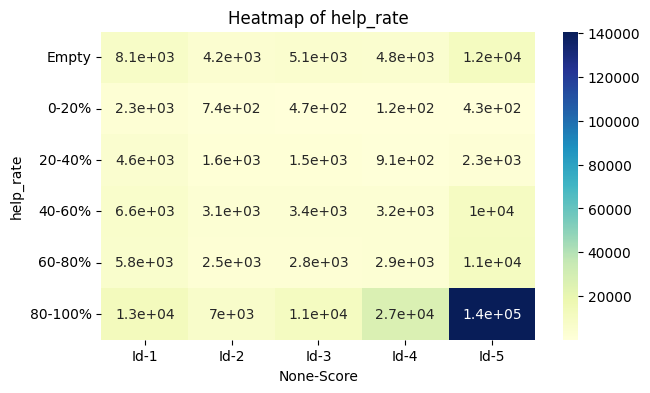

In [ ]:
plt.figure(figsize=(7,4))
sns.heatmap(df_summary.pivot(index="help_rate", columns="Score"), annot=True, cmap="YlGnBu")
plt.title("Heatmap of help_rate")
plt.show()

In [ ]:
df.Score.unique()

array([5, 1, 4, 2, 3])

In [ ]:
list(set(df.Score))

[1, 2, 3, 4, 5]

In [ ]:
# Converting the scores into 2 categories --> 0 & 1
# 1 for scores of 4 and 5
# 0 for scores of 1 and 2
# scores of 3 are neutral and will be excluded

In [ ]:
new_df = df[df.Score != 3]
x = new_df["Text"]
score_cat = {1:0, 2:0, 4:1, 5:1}
y = new_df["Score"].map(score_cat)
# map() function returns a map object(which is an iterator) of the results after
# applying the given function to each item of a given iterable (list, tuple etc.)
# Syntax : map(func, iter)

# num = [1,2,3,4]
# ans = map(lambda x : x**2, num)
# print(list(ans))

In [ ]:
y

0         1
1         0
2         1
3         0
4         1
         ..
568449    1
568450    0
568451    1
568452    1
568453    1
Name: Score, Length: 525773, dtype: int64

In [ ]:
y.value_counts()

1    443766
0     82007
Name: Score, dtype: int64

In [ ]:
new_df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfullness,help_rate
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-1.0,NaN


In [ ]:
x.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [ ]:
# converting the text into vectors
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words = 'english')
# CountVectorizer:
# Convert a collection of text documents to a matrix of token counts.
# It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [ ]:
x_vect = vectorizer.fit_transform(x)

In [ ]:
x_vect.shape

(525773, 114967)

In [ ]:
x.shape

(525773,)

In [ ]:
print(f"The no of features = {x_vect.shape[1]}")

The no of features = 114967


In [ ]:
# print(x_vect.toarray())

In [ ]:
print(x_vect[0])

  (0, 22339)	1
  (0, 110162)	1
  (0, 25060)	1
  (0, 38563)	1
  (0, 46694)	1
  (0, 83025)	1
  (0, 50509)	1
  (0, 84561)	1
  (0, 83005)	2
  (0, 64821)	1
  (0, 63908)	1
  (0, 98504)	1
  (0, 82915)	1
  (0, 67769)	1
  (0, 95333)	1
  (0, 20373)	2
  (0, 62371)	1
  (0, 45571)	1
  (0, 9225)	1


In [ ]:
# helper function for model training
def models_fit(x, y, nlp_model, ml_model, show_coeff=1):
  import numpy as np
  from sklearn.model_selection import train_test_split

  x_vectorised = nlp_model.fit_transform(x)
  print(f"The no of features = {x_vectorised.shape[1]}")

  x_train, x_test, y_train, y_test = train_test_split(x_vectorised, y, random_state=42, test_size=0.2)
  print(f"Training records (x_train) = {x_train.shape[0]}")
  print(f"Testing records (x_test) = {x_test.shape[0]}")

  model_ml = ml_model.fit(x_train, y_train)
  acc = model_ml.score(x_test, y_test)
  print(f"Accuracy of the model is {np.round(acc*100, 2)}%")

  if(show_coeff == 1):
    word = nlp_model.get_feature_names_out()
    coeff = model_ml.coef_.tolist()[0]

    coeff_diff = pd.DataFrame(zip(word, coeff), columns=["Word", "Coefficient"]).sort_values(["Coefficient", "Word"], ascending=False)
    print("\n")   # next line
    print("\n ------ Top 20 Positives ------")
    print(coeff_diff[["Coefficient", "Word"]].head(20).to_string(index=False))

    print("\n")
    print("\n ------ Top 20 Negatives ------")
    print(coeff_diff[["Coefficient", "Word"]].tail(20).to_string(index=False))

In [ ]:
# prediction function
def model_predict(x, y, nlp_model, ml_model):
  import numpy as np
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import confusion_matrix
  from sklearn.metrics import classification_report

  x_vectorised = nlp_model.fit_transform(x)
  print(f"The no of features = {x_vectorised.shape[1]}")

  x_train, x_test, y_train, y_test = train_test_split(x_vectorised, y, random_state=42, test_size=0.2)
  print(f"Training records (x_train) = {x_train.shape[0]}")
  print(f"Testing records (x_test) = {x_test.shape[0]}")

  model_ml = ml_model.fit(x_train, y_train)
  pred = model_ml.predict(x_test)
  cm = confusion_matrix(y_test, pred)

  print(f"confusion matrix:\n {cm}")
  acc = accuracy_score(y_test, pred)
  print(f"Accuracy of the model is {np.round(acc*100, 2)}%")

  print(f"Classification Report:\n {classification_report(y_test, pred)}")

In [ ]:
# nlp model created above --> vectorizer
# now ml model
# model training
from sklearn.linear_model import LogisticRegression
lrModel = LogisticRegression()

In [ ]:
models_fit(x, y, vectorizer, lrModel)

The no of features = 114967
Training records (x_train) = 420618
Testing records (x_test) = 105155
Accuracy of the model is 93.73%



 ------ Top 20 Positives ------
 Coefficient        Word
    3.933647  pleasantly
    3.494152    downside
    3.263121   addicting
    2.781527   skeptical
    2.444321      delish
    2.418937      hooked
    2.292436      resist
    2.256325    tastiest
    2.239858    drawback
    2.220831      solved
    2.218468     easiest
    2.205124     settled
    2.180849         met
    2.161307     worries
    2.156587    hesitant
    2.121307       saves
    2.118066   excellent
    2.117524  economical
    2.088536        whim
    2.061961 exceptional



 ------ Top 20 Negatives ------
 Coefficient           Word
   -2.355636  dissapointing
   -2.376471          blech
   -2.503910      redeeming
   -2.540017          ruins
   -2.550323        defeats
   -2.566688        vomited
   -2.569781 disappointment
   -2.689225    disapointed
   -2.779595         la

In [ ]:
model_predict(x, y, vectorizer,  lrModel)

The no of features = 114967
Training records (x_train) = 420618
Testing records (x_test) = 105155
confusion matrix:
 [[12122  4224]
 [ 2367 86442]]
Accuracy of the model is 93.73%
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.79     16346
           1       0.95      0.97      0.96     88809

    accuracy                           0.94    105155
   macro avg       0.90      0.86      0.87    105155
weighted avg       0.94      0.94      0.94    105155



In [ ]:
# The accuracy is 93.73%
# Using dummy classifier to verify the results
from sklearn.dummy import DummyClassifier
dmClassifier = DummyClassifier()

In [ ]:
# training the model with dummy classifier
models_fit(x, y, vectorizer, dmClassifier, 0)

The no of features = 114967
Training records (x_train) = 420618
Testing records (x_test) = 105155
Accuracy of the model is 84.46%


In [ ]:
# using another vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert a collection of raw documents to a matrix of TF-IDF features(used in the fields of information retrieval (IR))
# Equivalent to CountVectorizer followed by TfidfTransformer.
# TF-IDF --> Term Frequency - Inverse Document Frequency Model (quantifies the importance or relevance of strings in a document)

In [ ]:
tf_idf = TfidfVectorizer(stop_words='english')
lrModel = LogisticRegression()
models_fit(x, y, tf_idf, lrModel)

The no of features = 114967
Training records (x_train) = 420618
Testing records (x_test) = 105155
Accuracy of the model is 93.54%



 ------ Top 20 Positives ------
 Coefficient       Word
   13.436205      great
   12.543033  delicious
   12.118780       best
   10.466037    perfect
    9.749857  excellent
    9.708505      loves
    9.052131     highly
    8.583154       love
    7.953829  wonderful
    7.929364     hooked
    7.852904    amazing
    7.620703    awesome
    7.505157   favorite
    7.461071       good
    7.437080       nice
    7.217096 pleasantly
    6.746275      yummy
    6.708223  fantastic
    6.573991     smooth
    6.549733    pleased



 ------ Top 20 Negatives ------
 Coefficient           Word
   -5.856056          sadly
   -6.084857        sounded
   -6.098816          worse
   -6.142616     disgusting
   -6.265314    undrinkable
   -6.367335          bland
   -6.456690           yuck
   -6.473793          stale
   -6.516669         return
   -6.565927    

In [ ]:
model_predict(x, y, tf_idf, lrModel)

The no of features = 114967
Training records (x_train) = 420618
Testing records (x_test) = 105155
confusion matrix:
 [[11432  4914]
 [ 1877 86932]]
Accuracy of the model is 93.54%
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.70      0.77     16346
           1       0.95      0.98      0.96     88809

    accuracy                           0.94    105155
   macro avg       0.90      0.84      0.87    105155
weighted avg       0.93      0.94      0.93    105155



In [ ]:
# The accuracy (93.54%) is almost the same
# but here the words have higher coefficients

In [ ]:
# Help-rate prediction
newDf = df.loc[df.Score == 5]
newDf.shape

(363111, 12)

In [ ]:
newDf.help_rate.unique()

['80-100%', NaN, '60-80%', 'Empty', '40-60%', '20-40%', '0-20%']
Categories (6, object): ['Empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [ ]:
data = newDf.loc[newDf.help_rate.isin(['0-20%', '20-40%', '60-80%', '80-100%'])]
data.shape

(154426, 12)

In [ ]:
x = data.Text
x.head()

0     I have bought several of the Vitality canned d...
8     Right now I'm mostly just sprouting this so my...
10    I don't know if it's the cactus or the tequila...
11    One of my boys needed to lose some weight and ...
14    The Strawberry Twizzlers are my guilty pleasur...
Name: Text, dtype: object

In [ ]:
score_cat = {'0-20%':0, '20-40%':0, '60-80%':1, '80-100%':1}
y = data.help_rate.map(score_cat)
y

0         1.0
8         1.0
10        1.0
11        1.0
14        1.0
         ... 
568440    1.0
568444    1.0
568445    1.0
568451    1.0
568452    1.0
Name: help_rate, Length: 154426, dtype: float64

In [ ]:
y_values = y.value_counts()
percentage = np.round((y_values.values/(y_values.values[0]+y_values.values[1]))*100, 3)
y_df = pd.DataFrame(y_values.values, index=y_values.index, columns=["Score: ---- Total_count"])
y_df["Per_Contribution(%)"] = percentage
y_df

,Score: ---- Total_count,Per_Contribution(%)
1.0,151719,98.247
0.0,2707,1.753


In [ ]:
# y_df is highly skewed the positive contribution is 98% and only 2% is the negative contribution
# hence resampling is necessary for a balanced sample

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer()

In [ ]:
x_tf = tf_idf.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_tf, y, test_size=0.2, random_state=3)

In [ ]:
y_test.value_counts()

1.0    30344
0.0      542
Name: help_rate, dtype: int64

In [ ]:
# Using RandomOverSampler to handle unbalanced data
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler()
# Class to perform random over-sampling.

In [ ]:
x_train_resampled, y_train_resampled = ros.fit_resample(x_tf, y)

In [ ]:
x_train_resampled.shape, y_train_resampled.shape

((303438, 67507), (303438,))

In [ ]:
from collections import Counter
# ?Counter

In [ ]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()

In [ ]:
logModel.fit(x_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
y.value_counts()

1.0    151719
0.0      2707
Name: help_rate, dtype: int64

In [ ]:
# original y values before random oversampling
y_values = y_train.value_counts()
pd.DataFrame(y_values.values, index=y_values.index, columns=["Score: ---- Total_count"])

,Score: ---- Total_count
1.0,121375
0.0,2165


In [ ]:
# y values after random oversampling
y_values_resample = y_train_resampled.value_counts()
pd.DataFrame(y_values_resample.values, index=y_values_resample.index, columns=["Score: ---- Total_count"])

,Score: ---- Total_count
1.0,151719
0.0,151719


In [ ]:
print(f"Original dataset shape:  {Counter(y_train)}")
print(f"Resampled dataset shape:  {Counter(y_train_resampled)}")

Original dataset shape:  Counter({1.0: 121375, 0.0: 2165})
Resampled dataset shape:  Counter({1.0: 151719, 0.0: 151719})


In [ ]:
# To improve our model, We will employ GridSearchCV which is a process of performing hyperparameter
# tuning in order to determine the optimal values for a given model. GridSearchCV loops through
# predefined hyperparameters and fit the model on the training set. So, that in the end,the best
# parameters from the listed hyperparameters is selected.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# define a set of grid parameters to iterate
grid_param = {'C':10.0*np.arange(-2,3), 'penalty': ['l1', 'l2']}

# grid search with logistic regression
grid = GridSearchCV(logModel, grid_param, refit=True, verbose=3, n_jobs=-1)

In [ ]:
# training the model
from sklearn.metrics import *

grid.fit(x_train_resampled, y_train_resampled)
grid_pred = grid.predict(x_test)
acc = accuracy_score(y_test, grid_pred)

# print the best parameter after tuning
print(f"grid.best_params_ => {grid.best_params_}")

print(f"Confusion Matrix:\n {confusion_matrix(y_test, grid_pred)}")
print(f"Model Accuracy = {np.round(acc*100, 3)}%")
print(f"Classification Report:\n {classification_report(y_test, grid_pred)}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
grid.best_params_ => {'C': 20.0, 'penalty': 'l2'}
Confusion Matrix:
 [[  542     0]
 [  651 29693]]
Model Accuracy = 97.892%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.45      1.00      0.62       542
         1.0       1.00      0.98      0.99     30344

    accuracy                           0.98     30886
   macro avg       0.73      0.99      0.81     30886
weighted avg       0.99      0.98      0.98     30886



In [ ]:
# a much more balanced results obtained